# Sherwan Thomas

## Research question/interests

I would like to find out relationsips between average age of the player with position and performance using specific stats that comprise the main attributes : Shooting(SHO), Pace(PAC), Physical (PHY), Defence (DEF), Dribbling(DRI) and Passing(PAS).

In [1]:
# Importing libraries including custom library project_functions1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf1
import project_functions2 as pf2
import project_functions3 as pf3
import re

df= pd.read_csv("../data/raw/FIFA22_official_data.csv")

df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


# EDA

In [2]:
# Getting some basic info about dataset

print(df.head(3))
print(df.shape)
print(df.columns)

       ID             Name  Age  \
0  212198  Bruno Fernandes   26   
1  209658      L. Goretzka   26   
2  176580        L. Suárez   34   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/212/198/22_60.png    Portugal   
1  https://cdn.sofifa.com/players/209/658/22_60.png     Germany   
2  https://cdn.sofifa.com/players/176/580/22_60.png     Uruguay   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.com/flags/pt.png       88         89   
1  https://cdn.sofifa.com/flags/de.png       87         88   
2  https://cdn.sofifa.com/flags/uy.png       88         88   

                 Club                                Club Logo  ...  \
0   Manchester United   https://cdn.sofifa.com/teams/11/30.png  ...   
1   FC Bayern München   https://cdn.sofifa.com/teams/21/30.png  ...   
2  Atlético de Madrid  https://cdn.sofifa.com/teams/240/30.png  ...   

  SlidingTackle GKDiving  GKHandling GKKicking  GKPositi

In [3]:
#Checking for the unique values
df.nunique(axis=0)


ID                     16710
Name                   16089
Age                       30
Photo                  16710
Nationality              168
                       ...  
GKReflexes                74
Best Position             15
Best Overall Rating       51
Release Clause          1170
DefensiveAwareness        90
Length: 65, dtype: int64

In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))



,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,...,892.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,220560.467923,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,...,48.021300,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,38496.607959,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,...,21.904204,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,27.000000,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,4.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,203891.250000,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,...,27.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,229253.000000,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,...,53.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,245368.750000,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,...,67.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,93.000000,90.000000,93.000000,93.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [6]:
# To figure out the range of age, min and max.
print(len(df.Age.unique()))
print(max(df.Age))
print(min(df.Age))



30
54
16


Text(0, 0.5, 'Age')

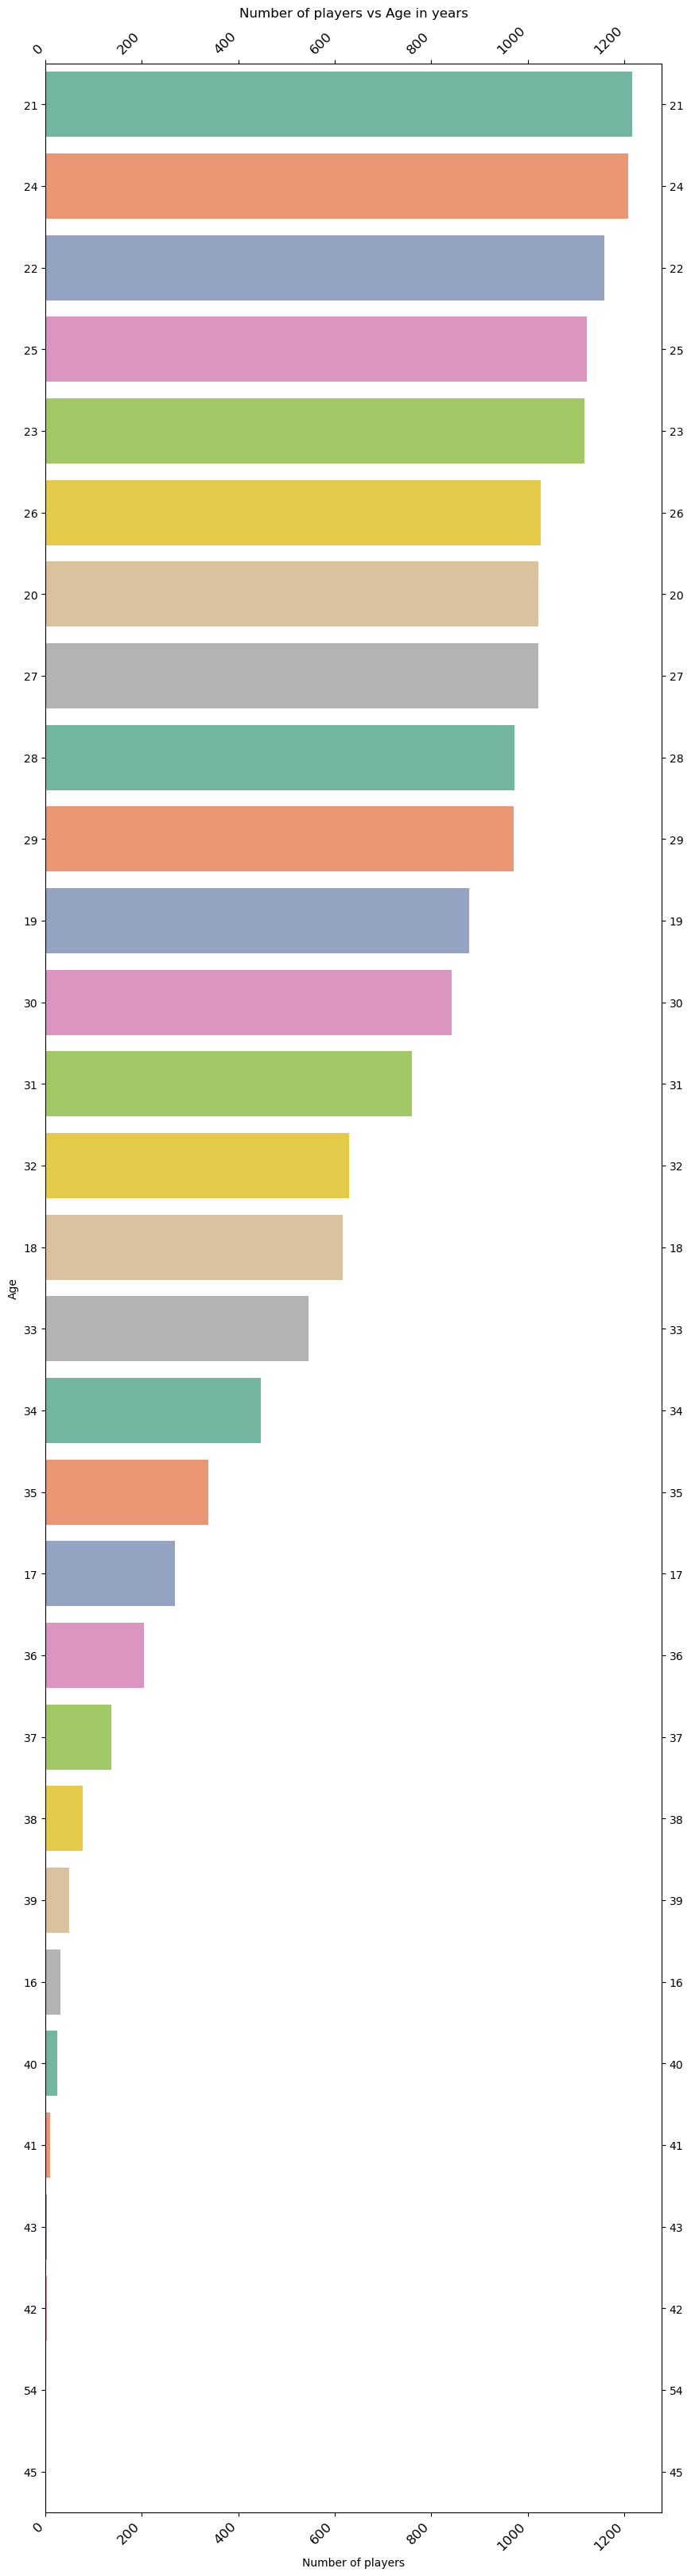

In [7]:
#Plot to see which specific age has the most players playing currently.

plt.figure(figsize=(10,40));
chart = sns.countplot(data=df,y='Age',palette='Set2',order = df['Age'].value_counts().index);
plt.tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='large');

plt.title("Number of players vs Age in years")
plt.xlabel("Number of players")
plt.ylabel("Age")

# As we look at this chart of number of players in different ages, we can see that most of players currently playing are between the agessof 20-30 
# with most players being in the age range of 20-27.

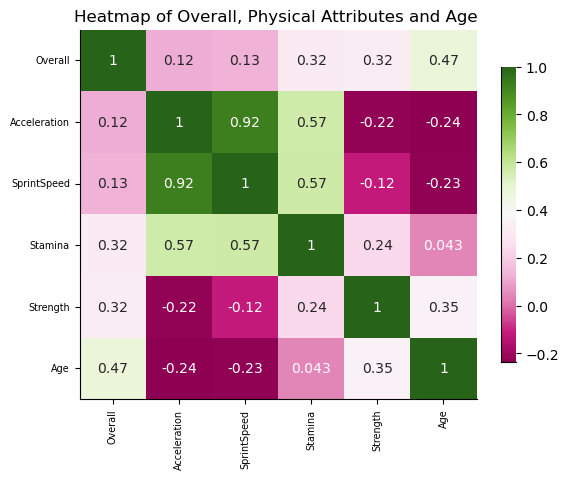

In [8]:
heat = df[['Overall', 'Acceleration', 'SprintSpeed', 'Stamina','Strength','Age' ]].corr()
sns.heatmap(heat, annot=True, cmap='PiYG',            
            annot_kws={'fontsize': 10},
           cbar_kws={'shrink': 0.8})
sns.despine()

plt.xticks(fontsize='x-small')
plt.yticks(fontsize='x-small')
plt.title("Heatmap of Overall, Physical Attributes and Age ", fontsize = 12)
sns.despine()

In [9]:
# When we look at the correlations with age, we see a small negative correlation with sprint speed and acceleration and a positive correlation with strength.

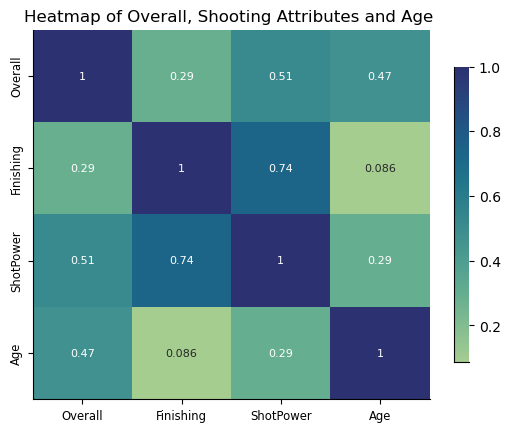

In [10]:
heat = df[['Overall', 'Finishing', 'ShotPower', 'Age' ]].corr()
sns.heatmap(heat, annot=True, cmap='crest',            
            annot_kws={'fontsize': 8},
           cbar_kws={'shrink': 0.8})
sns.despine()

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.title("Heatmap of Overall, Shooting Attributes and Age ", fontsize = 12)
sns.despine()

In [11]:
# A slight positive correlation with age and shot power (indicating an increase in shot power with age) and shooting attributes with overall.

Text(30.875, 0.5, 'Age')

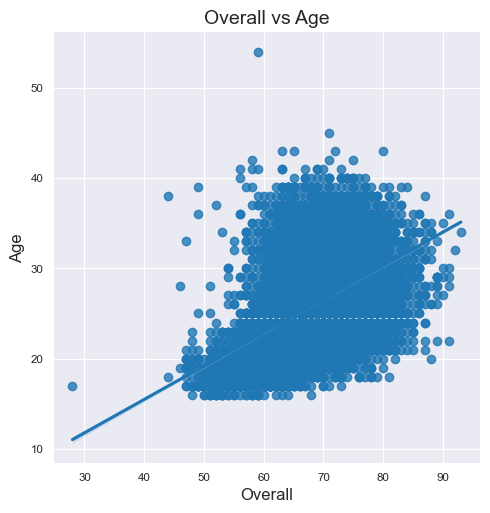

In [12]:
#Plotting relationship between overall and age
sns.set_style("darkgrid")
sns.lmplot(x='Overall', y='Age', data=df)
sns.despine()

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.title("Overall vs Age", fontsize = 14)
plt.xlabel("Overall", fontsize = 12)
plt.ylabel("Age", fontsize = 12)

## It looks like as age increases, overall tends to increase as well.## 

Text(0, 0.5, 'Age')

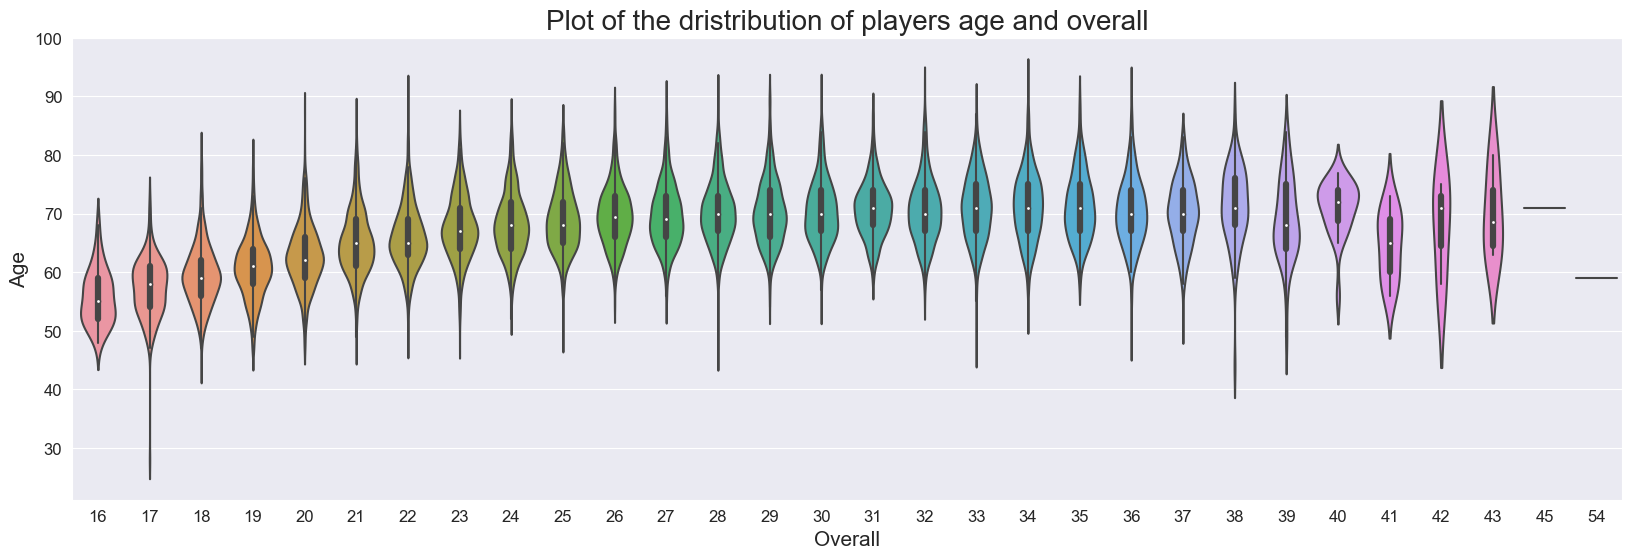

In [13]:
#Distribution of age and value

plt.figure(figsize=(20,6))
chart = sns.violinplot(x='Age',y='Overall',data=df)

plt.xticks(fontsize='large');
plt.yticks(fontsize='large');
plt.title("Plot of the dristribution of players age and overall", fontsize = 20)
plt.xlabel("Overall", fontsize = 15)
plt.ylabel("Age", fontsize = 15)



## I can see that the value of a player is at the highest when they are between 20 - 30 years old ##

# Data Analysis 

In [15]:
# Data Cleaning
   
#Loading the data and printing the first few line
df_Acleaned = pf1.get_cleaned_data("../data/raw/FIFA22_official_data.csv")

print(df_Acleaned.columns)
df_Acleaned.shape

"""df_Bcleaned = pf3.arrange_pos(df_Acleaned)
print(df_Bcleaned)"""

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Body Type', 'Position', 'Jersey Number', 'Joined',
       'LoanedFrom', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'OnLoan'],
      dtype='object')


'df_Bcleaned = pf3.arrange_pos(df_Acleaned)\nprint(df_Bcleaned)'

In [16]:
df_Bcleaned = pf3.remove_exs(df_Acleaned)
df_Bcleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 16709 to 10224
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                16710 non-null  int64  
 1   Nationality        16710 non-null  object 
 2   Overall            16710 non-null  int64  
 3   Position           16710 non-null  object 
 4   Crossing           16710 non-null  float64
 5   Finishing          16710 non-null  float64
 6   HeadingAccuracy    16710 non-null  float64
 7   ShortPassing       16710 non-null  float64
 8   Volleys            16673 non-null  float64
 9   Dribbling          16710 non-null  float64
 10  Curve              16673 non-null  float64
 11  Freekick Accuracy  16710 non-null  float64
 12  LongPassing        16710 non-null  float64
 13  BallControl        16710 non-null  float64
 14  Acceleration       16710 non-null  float64
 15  SprintSpeed        16710 non-null  float64
 16  Agility           

In [19]:
df_Ccleaned = pf3.remove_def(df_Bcleaned)


df_final= df_Ccleaned.dropna(0)
df_last= df_final.reset_index(drop=True, inplace=False)

df_last.info


C:\Users\Sherwan Thomas\AppData\Local\Temp\ipykernel_15932\1830476869.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_final= df_Ccleaned.dropna(0)


<bound method DataFrame.info of       Age Nationality  Overall Position  Crossing  Finishing  HeadingAccuracy  \
0      34      France       72      CDM      54.0       51.0             74.0   
1      35   Argentina       77      LCM      70.0       68.0             70.0   
2      35      Panama       70      LCB      35.0       30.0             74.0   
3      38     England       78      RCM      79.0       77.0             65.0   
4      27     Iceland       62      RCM      58.0       52.0             60.0   
...   ...         ...      ...      ...       ...        ...              ...   
6690   23      Brazil       82      RCB      72.0       48.0             81.0   
6691   30       Spain       75       RM      75.0       71.0             68.0   
6692   27       Spain       68       GK      24.0       17.0             13.0   
6693   18     Romania       65       LW      61.0       59.0             33.0   
6694   22     Romania       68       RB      63.0       35.0             52.0

In [ ]:
# a) Age of the player and position- We will try to plot the average age of players for each position.


Text(0, 0.5, 'Count of players')

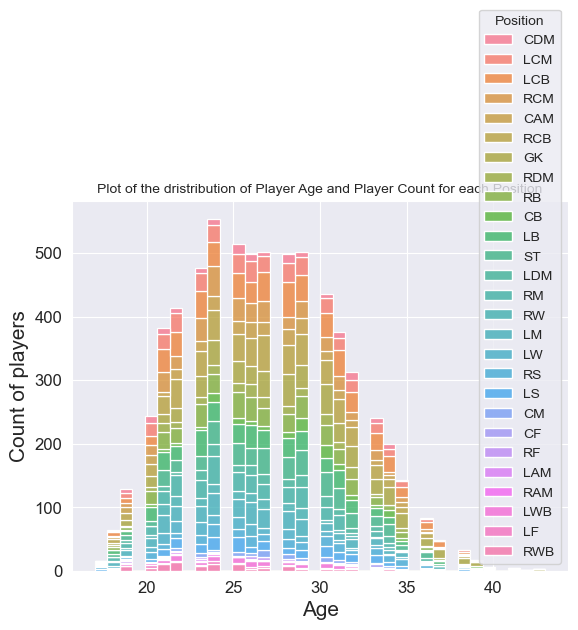

In [47]:
# Making the barplot for Age vs Position
import seaborn as sns

sns.histplot(data=df_last, x="Age", hue="Position", multiple="stack")
plt.xticks(fontsize='large');
plt.yticks(fontsize='large');
plt.title("Plot of the dristribution of Player Age and Player Count for each Position", fontsize = 10)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Count of players", fontsize = 15)
# tried to use this to position legend but did not work 
#plt.legend(loc="upper left")
